In [310]:
import pandas as pd
import numpy as np
import math
import sklearn.metrics
import seaborn as sns
import matplotlib.pyplot as plt

In [311]:
N = 10000 
p1 = 0.05
p0 = 0.95
dataset=np.array([[]])

In [312]:
for i in range(0,N):
  y = np.random.binomial(1,p1,1)
  if y[0]==0:
    x = np.random.normal(0,1,1)
  else:
    x = np.random.normal(1,1,1)
  if i==0:
    dataset=np.array([[x[0],y[0]]])
  else:
    dataset=np.append(dataset,np.array([[x[0],y[0]]]),axis=0)
dataset

array([[-0.64596475,  0.        ],
       [-0.23608258,  0.        ],
       [-0.21219661,  0.        ],
       ...,
       [-0.52526155,  0.        ],
       [-0.50644688,  0.        ],
       [ 1.84703364,  0.        ]])

In [313]:
dataset.shape

(10000, 2)

In [314]:
df=pd.DataFrame(dataset)
df

,0,1
0,-0.645965,0.0
1,-0.236083,0.0
2,-0.212197,0.0
3,-1.530684,0.0
4,0.642908,0.0
...,...,...
9995,-0.168521,0.0
9996,-0.158006,0.0
9997,-0.525262,0.0
9998,-0.506447,0.0


In [315]:
df.rename(columns={0:'X',1:'Y'},inplace=True)
df

,X,Y
0,-0.645965,0.0
1,-0.236083,0.0
2,-0.212197,0.0
3,-1.530684,0.0
4,0.642908,0.0
...,...,...
9995,-0.168521,0.0
9996,-0.158006,0.0
9997,-0.525262,0.0
9998,-0.506447,0.0


In [316]:
Hb = np.zeros(N)




In [317]:
def f0(x, mu=0, sigma=1):
    x = float(x - mu) / sigma
    return math.exp(-x*x/2.0) / math.sqrt(2.0*math.pi) / sigma

def f1(x, mu=1, sigma=1):
    x = float(x - mu) / sigma
    return math.exp(-x*x/2.0) / math.sqrt(2.0*math.pi) / sigma


In [318]:
for i in range(0,N):
  y=df.iloc[i][1]
  x=df.iloc[i][0]
  Q1=(p1*f1(x))/(p1*f1(x)+p0*f0(x))
  Q0=(p0*f0(x))/(p1*f1(x)+p0*f0(x))
  if Q1>=Q0:
    Hb[i] = 1
  else:
    Hb[i] = 0
  

In [319]:
df['Hb']=Hb
df

,X,Y,Hb
0,-0.645965,0.0,0.0
1,-0.236083,0.0,0.0
2,-0.212197,0.0,0.0
3,-1.530684,0.0,0.0
4,0.642908,0.0,0.0
...,...,...,...
9995,-0.168521,0.0,0.0
9996,-0.158006,0.0,0.0
9997,-0.525262,0.0,0.0
9998,-0.506447,0.0,0.0


In [320]:
f1=np.zeros((2,2))

In [321]:
for i in range(0,df.shape[0]):
    if df.iloc[i][1]==1:
        if df.iloc[i][2]==1:
            f1[0][0]+=1
        else:
            f1[1][0]+=1
    else:
        if df.iloc[i][2]==1:
            f1[0][1]+=1
        else:
            f1[1][1]+=1

In [322]:
f1

array([[7.000e+00, 3.000e+00],
       [4.720e+02, 9.518e+03]])

In [323]:
TP=f1[0][0]
TN=f1[1][1]
FP=f1[0][1]
FN=f1[1][0]

In [324]:
precision=TP/(TP+FP)
recall=TP/(TP+FN)
print("Precision: " +str(precision))
print("Recall: " +str(recall))


Precision: 0.7
Recall: 0.014613778705636743


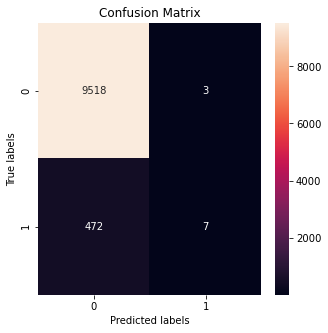

In [325]:
confusionMat=sklearn.metrics.confusion_matrix(df['Y'],df['Hb'])
confusionMat
ax= plt.subplots(figsize=(5,5))

ax=sns.heatmap(confusionMat, annot=True, fmt='g');  #annot=True to annotate cells, ftm='g' to disable scientific notation

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

In [326]:
cntOfWrongPred=0
for i in range(0,N):
  y=df.iloc[i][1]
  hb=df.iloc[i][2]
  if y!=hb:
    cntOfWrongPred+=1

Perr=cntOfWrongPred/N
Perr

0.0475

In [329]:
df2=pd.DataFrame(dataset)
df2

,0,1
0,-0.645965,0.0
1,-0.236083,0.0
2,-0.212197,0.0
3,-1.530684,0.0
4,0.642908,0.0
...,...,...
9995,-0.168521,0.0
9996,-0.158006,0.0
9997,-0.525262,0.0
9998,-0.506447,0.0
